### Convolutional Neural Networks: Application
Build and train a ConvNet in TensorFlow for binary and multiclass classification problem using Sequential and Functional APIs of tensorflow.

In [23]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

import warnings
warnings.filterwarnings('ignore')

In [24]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


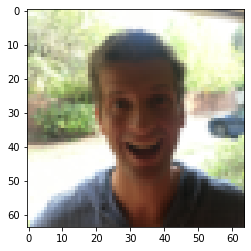

In [25]:
index = 125
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

#### Sequential API

In [26]:
def happyModel(): 
    model = tf.keras.Sequential(
        [
            tfl.ZeroPadding2D(padding = (3, 3), input_shape = (64, 64, 3)),
            tfl.Conv2D(32, 7, strides = 1),
            tfl.BatchNormalization(axis = 3),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(1, activation = 'sigmoid')
        ]
    )
    return model

In [27]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [28]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [29]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 1s 4ms/step - loss: 0.7894 - accuracy: 0.7550
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8833
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.1567 - accuracy: 0.9483
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1531 - accuracy: 0.9433
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.9500
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 0.9783
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.9567: 0s - loss: 0.1652 - accuracy: 0.
Epoch 8/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9617
Epoch 9/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9483
Epoch 10/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0912 - ac

#### Functional API

In [30]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


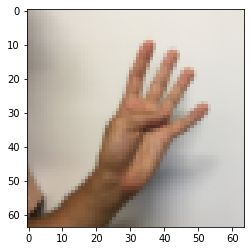

In [31]:
# Example of an image from the dataset
index = 5
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [32]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [33]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'   
    Z1 = tfl.Conv2D(8, 4, strides = 1, padding='same')(input_img)
    
    ## RELU
    A1 = tfl.ReLU()(Z1)
    
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size = (8, 8), strides = (8,8), padding='same')(A1)
    
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(16, 2, strides = 1, padding='same')(P1)
    
    ## RELU
    A2 = tfl.ReLU()(Z2)
    
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size = (4, 4), strides = (4,4), padding='same')(A2)
    
    ## FLATTEN
    F = tfl.Flatten()(P2)
    
    ## Dense layer
    outputs = tfl.Dense(6, activation = 'softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [34]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 16)          0   

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 0s 12ms/step - loss: 1.8216 - accuracy: 0.1611 - val_loss: 1.7928 - val_accuracy: 0.1500
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7909 - accuracy: 0.1852 - val_loss: 1.7869 - val_accuracy: 0.1833
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7841 - accuracy: 0.2028 - val_loss: 1.7807 - val_accuracy: 0.2167
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7781 - accuracy: 0.2278 - val_loss: 1.7741 - val_accuracy: 0.3083
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7721 - accuracy: 0.3167 - val_loss: 1.7667 - val_accuracy: 0.3500
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7650 - accuracy: 0.3537 - val_loss: 1.7584 - val_accuracy: 0.3917
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7558 - accuracy: 0.4139 - val_loss: 1.7483 - val_accuracy: 0.4083
Epoch 8/100


Epoch 59/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5898 - accuracy: 0.8083 - val_loss: 0.6182 - val_accuracy: 0.8250
Epoch 60/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5835 - accuracy: 0.8074 - val_loss: 0.6122 - val_accuracy: 0.8250
Epoch 61/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5769 - accuracy: 0.8102 - val_loss: 0.6054 - val_accuracy: 0.8250
Epoch 62/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5703 - accuracy: 0.8130 - val_loss: 0.5990 - val_accuracy: 0.8250
Epoch 63/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.8185 - val_loss: 0.5927 - val_accuracy: 0.8250
Epoch 64/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5577 - accuracy: 0.8204 - val_loss: 0.5865 - val_accuracy: 0.8250
Epoch 65/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5518 - accuracy: 0.8250 - val_loss: 0.5808 - val_accuracy: 0.8250
Epoch 

In [36]:
history.history

{'loss': [1.821573257446289,
  1.7908753156661987,
  1.7841192483901978,
  1.7781381607055664,
  1.772072434425354,
  1.7650164365768433,
  1.7558079957962036,
  1.7466371059417725,
  1.7326606512069702,
  1.7174310684204102,
  1.6981050968170166,
  1.6738742589950562,
  1.646333932876587,
  1.6139743328094482,
  1.5762778520584106,
  1.5316575765609741,
  1.4832834005355835,
  1.4305729866027832,
  1.3745912313461304,
  1.320825457572937,
  1.2620091438293457,
  1.2105238437652588,
  1.161298394203186,
  1.1180299520492554,
  1.0810540914535522,
  1.0444116592407227,
  1.0125465393066406,
  0.9833492636680603,
  0.9570913910865784,
  0.9311431050300598,
  0.9100509285926819,
  0.8889012932777405,
  0.8703066110610962,
  0.8517516255378723,
  0.8343421816825867,
  0.8182143568992615,
  0.8032427430152893,
  0.7891861796379089,
  0.7754760384559631,
  0.7625747919082642,
  0.7503964900970459,
  0.7383024096488953,
  0.727070152759552,
  0.7165300846099854,
  0.7062001824378967,
  0.6960

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

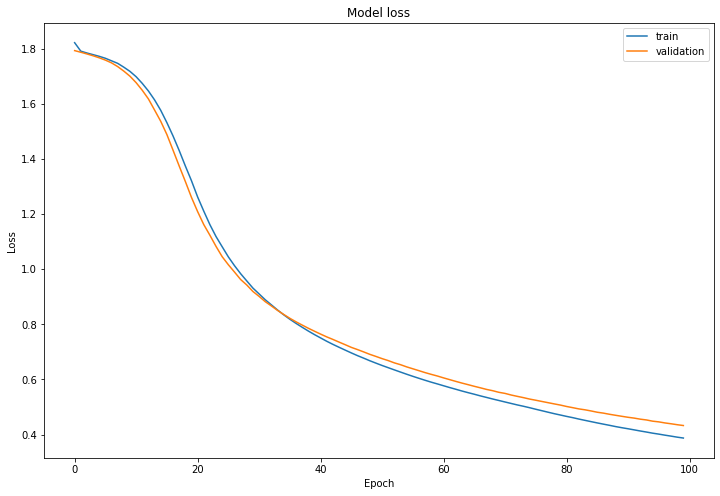

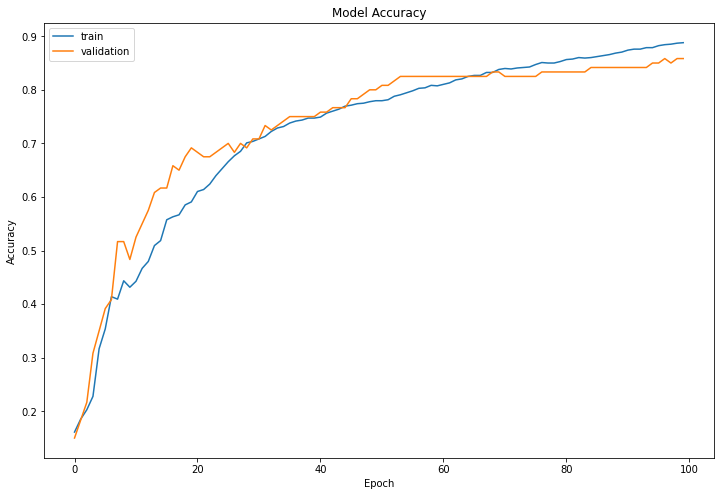

In [37]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')